# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [5]:
# you are free to use any package you deem fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



## Dataset

In [6]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)



## Training

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [18]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
knn_Y_test_pred = knn_model.predict(X_test)
rf_Y_test_pred = rf_model.predict(X_test)

## Testing / Optimization

In [27]:
def decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    
    

Text(0.5, 1.0, 'Decision Boundary for KNeighborsClassifier')

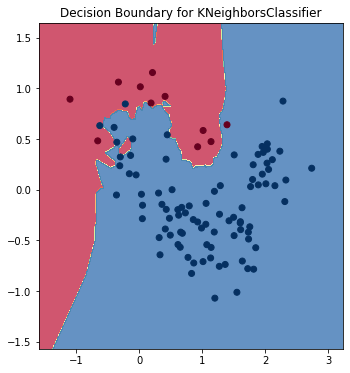

In [28]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
decision_boundary(knn_model, X_test, y_test)
plt.title("Decision Boundary for KNeighborsClassifier")

Text(0.5, 1.0, 'Decision Boundary for RandomForestClassifier')

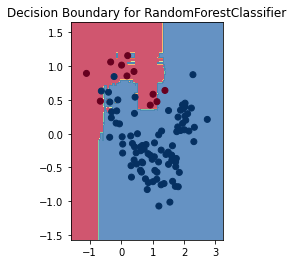

In [29]:
plt.subplot(1, 2, 2)
decision_boundary(rf_model, X_test, y_test)
plt.title("Decision Boundary for RandomForestClassifier")


## Performance Analysis

In [34]:
knn_train_score = knn_model.score(X_train, y_train)
print(f'Training Accuracy for KNeighborsClassifier: {knn_train_score:.2f}')

Training Accuracy for KNeighborsClassifier: 0.97


In [36]:
rf_train_score = rf_model.score(X_train, y_train)
print(f'Training Accuracy for RandomForestClassifier: {rf_train_score:.2f}')


Training Accuracy for RandomForestClassifier: 1.00


In [38]:
print("\nClassification Report for KNeighborsClassifier on Testing Data:")
print(classification_report(y_test, knn_Y_test_pred))


Classification Report for KNeighborsClassifier on Testing Data:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.99      0.98      0.98        89

    accuracy                           0.97       100
   macro avg       0.91      0.94      0.93       100
weighted avg       0.97      0.97      0.97       100



In [40]:
print("\nClassification Report for RandomForestClassifier on Testing Data:")
print(classification_report(y_test, rf_Y_test_pred))


Classification Report for RandomForestClassifier on Testing Data:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.99      0.97      0.98        89

    accuracy                           0.96       100
   macro avg       0.88      0.94      0.91       100
weighted avg       0.96      0.96      0.96       100



In [42]:
print("both models did pretty okay!")

both models did pretty okay!
